In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xarray as xr
import geopandas as gpd
import shapely
from shapely.geometry import Point

## Climate data download

I have data on all states in India. The data can be found on the website copernicus.eu

The data correspond to : the soil temperature (level 1) : stl1, the volumetric soil water (layer 1) : swvl1, the surface net solar radiation : ssr, the evaporation from bare soil : evabs, the total precipitation and leaf area indices (high and low vegetation) : lai_hv and lai_lv.

I test first on Andhra Pradesh.

In [131]:
map_path = "../../maps/ind_adm_shp/IND_adm2.shp"

map_gdf = gpd.read_file(map_path)
map_gdf

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,105,IND,India,1,Andaman and Nicobar,1,Nicobar Islands,IN.AN.NI,0,None,District,District,None,None,"MULTIPOLYGON (((92.78778 9.24417, 92.78889 9.2..."
1,105,IND,India,1,Andaman and Nicobar,2,North and Middle Andaman,IN.AN.NM,0,None,District,District,None,None,"MULTIPOLYGON (((93.64841 14.93487, 93.64917 14..."
2,105,IND,India,1,Andaman and Nicobar,3,South Andaman,IN.AN.SA,0,None,District,District,None,None,"MULTIPOLYGON (((93.83970 12.32082, 93.85775 12..."
3,105,IND,India,2,Andhra Pradesh,4,Anantapur,IN.AD.AN,0,None,District,District,None,"Anantpur, Ananthapur","POLYGON ((77.69000 15.17628, 77.69378 15.17347..."
4,105,IND,India,2,Andhra Pradesh,5,Chittoor,IN.AD.CH,0,None,District,District,None,Chitoor|Chittor,"POLYGON ((78.47611 13.93680, 78.48208 13.93007..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,105,IND,India,36,West Bengal,662,Pashchim Medinipur,IN.WB.WM,0,None,District,District,None,Paschim Medinipur,"POLYGON ((87.42143 22.92110, 87.44063 22.91789..."
663,105,IND,India,36,West Bengal,663,Purba Medinipur,IN.WB.EM,0,None,District,District,None,Purba Medinipur,"MULTIPOLYGON (((88.14139 22.02639, 88.14250 22..."
664,105,IND,India,36,West Bengal,664,Puruliya,IN.WB.PU,0,None,District,District,None,None,"POLYGON ((85.88916 23.15176, 85.88641 23.15335..."
665,105,IND,India,36,West Bengal,665,South 24 Parganas,IN.WB.PS,0,None,District,District,None,None,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21..."


In [132]:
ds_Andhra_Pradesh = xr.open_dataset('../../Data/ClimateData/Andhra_Pradesh.nc')
df_Andhra_Pradesh = ds_Andhra_Pradesh.to_dataframe()
df_Andhra_Pradesh.reset_index(inplace=True)
print(df_Andhra_Pradesh)
df_Andhra_Pradesh = df_Andhra_Pradesh.drop(columns = ['longitude', 'latitude'])

#cols = df_Andhra_Pradesh.columns.to_numpy()
#mean_arr = df_Andhra_Pradesh.mean().to_numpy().reshape(1,7)
#var_arr = df_Andhra_Pradesh.var().to_numpy().reshape(1,7)
#print(mean_arr)

df_Andhra_Pradesh['time'] = df_Andhra_Pradesh['time'].astype('datetime64')
df_Andhra_Pradesh['ssr'] = df_Andhra_Pradesh['ssr']*1e-7
#print(df_Andhra_Pradesh)

mean_years_AP = df_Andhra_Pradesh.groupby(df_Andhra_Pradesh.time.dt.to_period("Y")).mean()
var_years_AP = df_Andhra_Pradesh.groupby(df_Andhra_Pradesh.time.dt.to_period("Y")).var()
#print(mean_years_AP)

cols = mean_years_AP.columns.to_numpy()
mean_mean_arr = mean_years_AP.mean().to_numpy().reshape(1,7)
mean_var_arr = mean_years_AP.var().to_numpy().reshape(1,7)
var_mean_arr = var_years_AP.mean().to_numpy().reshape(1,7)
var_var_arr = var_years_AP.var().to_numpy().reshape(1,7)
print(mean_mean_arr)

        longitude  latitude       time     evabs  lai_hv    lai_lv  \
0            77.0      16.5 1974-01-01 -0.000720     0.0  1.097173   
1            77.0      16.5 1974-02-01 -0.000450     0.0  1.033792   
2            77.0      16.5 1974-03-01 -0.000274     0.0  1.010142   
3            77.0      16.5 1974-04-01 -0.000520     0.0  0.936169   
4            77.0      16.5 1974-05-01 -0.000860     0.0  0.894185   
...           ...       ...        ...       ...     ...       ...   
575851       80.0      13.0 2016-08-01 -0.003465     0.0  1.360224   
575852       80.0      13.0 2016-09-01 -0.002808     0.0  1.370730   
575853       80.0      13.0 2016-10-01 -0.002444     0.0  1.311901   
575854       80.0      13.0 2016-11-01 -0.001580     0.0  1.279403   
575855       80.0      13.0 2016-12-01 -0.001915     0.0  1.199603   

              stl1         ssr            tp     swvl1  
0       299.266663  17181668.0  6.929040e-07  0.253156  
1       303.070435  18825472.0  1.117587e-06 

In [133]:
#mean_df = pd.DataFrame(mean_arr, columns = cols)
#mean_df

Now I work on all the states

In [134]:
states_names = ['Andhra_Pradesh', 'Bihar', 'Chhattisgarh', 'Gujarat', 'Haryana', 'Jharkhand', 'Karnataka', 'Madhya', 'Maharashtra', 'Odisha', 'Rajasthan', 'Tamil_Nadu', 'Telangana','Uttar_Pradesh', 'Uttarakhand', 'West_Bengal']

for state in states_names :
    if state != 'Andhra_Pradesh' :
        ds_state = xr.open_dataset(f'../../Data/ClimateData/{state}.nc')
        df_state = ds_state.to_dataframe()
        df_state.reset_index(inplace=True)
        df_state = df_state.drop(columns = ['longitude', 'latitude'])

        #mean_arr = np.concatenate((mean_arr, df_state.mean().to_numpy().reshape(1,7)), axis=0)
        #var_arr = np.concatenate((var_arr, df_state.var().to_numpy().reshape(1,7)), axis=0)

        df_state['time'] = df_state['time'].astype('datetime64')
        df_state['ssr'] = df_state['ssr']*1e-7

        mean_years_state = df_state.groupby(df_state.time.dt.to_period("Y")).mean()
        var_years_state = df_state.groupby(df_state.time.dt.to_period("Y")).var()

        mean_mean_arr = np.concatenate((mean_mean_arr, mean_years_state.mean().to_numpy().reshape(1,7)), axis=0)
        mean_var_arr = np.concatenate((mean_var_arr, var_years_state.mean().to_numpy().reshape(1,7)), axis=0)
        var_mean_arr = np.concatenate((var_mean_arr, mean_years_state.var().to_numpy().reshape(1,7)), axis=0)
        var_var_arr = np.concatenate((var_var_arr, var_years_state.var().to_numpy().reshape(1,7)), axis=0)

tot_arr = np.concatenate((mean_mean_arr, mean_var_arr, var_mean_arr, var_var_arr), axis=1)
tot_df = pd.DataFrame(tot_arr) #,columns=cols
print(tot_df)

#tot_arr = np.concatenate((mean_arr, var_arr), axis=1)
#tot_df = pd.DataFrame(tot_arr) #,columns=cols
#tot_df

          0         1         2           3         4         5         6   \
0  -0.001229  1.134480  1.330479  301.868713  1.581279  0.001978  0.248027   
1  -0.001656  1.031843  1.498345  299.748993  1.482268  0.003560  0.249124   
2  -0.001527  2.061678  2.172492  299.499023  1.537672  0.003853  0.248395   
3  -0.000732  1.268641  1.283179  302.195496  1.588620  0.001620  0.181327   
4  -0.000934  0.029176  1.110758  300.030548  1.510832  0.001516  0.160569   
5  -0.001622  2.010484  2.157724  298.446472  1.518544  0.003355  0.249539   
6  -0.001248  1.848178  1.625406  299.870880  1.596949  0.003452  0.294988   
7  -0.001355  1.823066  1.845102  300.041931  1.574159  0.002811  0.277803   
8  -0.001182  1.587249  1.741596  301.106171  1.628126  0.002679  0.272612   
9  -0.001669  2.157579  2.342014  300.082550  1.521580  0.003939  0.256250   
10 -0.000614  0.709890  0.971607  301.169769  1.505084  0.001227  0.135398   
11 -0.001585  1.814992  1.787796  301.546387  1.635548  0.002740

In [135]:
tot_df.insert(0,'state',states_names)

We obtain our dataframe. We are going to outline clusters between states based on this dataframe.

In [136]:
tot_df

,state,0,1,2,3,4,5,6,7,8,...,18,19,20,21,22,23,24,25,26,27
0,Andhra_Pradesh,-0.001229,1.134480,1.330479,301.868713,1.581279,0.001978,0.248027,3.255033e-08,2.453470e-11,...,0.076613,4.802656e-06,0.008340,1.663523e-14,7.455691e-11,7.417347e-15,3.835763,0.000130,4.024449e-12,1.673604e-06
1,Bihar,-0.001656,1.031843,1.498345,299.748993,1.482268,0.003560,0.249124,3.501319e-07,1.011809e+00,...,0.001287,2.403487e-07,0.000090,6.598254e-15,3.412872e-11,1.828802e-13,15.829796,0.000180,4.134414e-11,1.295352e-06
2,Chhattisgarh,-0.001527,2.061678,2.172492,299.499023,1.537672,0.003853,0.248395,2.900420e-07,2.476165e-01,...,0.002349,4.174124e-07,0.000207,3.226073e-15,1.064060e-10,2.638507e-11,11.519966,0.000403,6.601789e-11,2.042819e-06
3,Gujarat,-0.000732,1.268641,1.283179,302.195496,1.588620,0.001620,0.181327,5.716803e-07,9.651551e-01,...,0.001175,3.089622e-07,0.000198,1.583360e-14,4.293404e-11,2.244909e-11,5.337778,0.000231,4.204027e-11,3.810828e-06
4,Haryana,-0.000934,0.029176,1.110758,300.030548,1.510832,0.001516,0.160569,7.001354e-07,5.446410e-02,...,0.001007,1.496486e-07,0.000252,2.322358e-14,3.552053e-16,2.476417e-08,39.287380,0.000144,4.850544e-12,3.457962e-06
5,Jharkhand,-0.001622,2.010484,2.157724,298.446472,1.518544,0.003355,0.249539,2.546512e-07,1.801565e-01,...,0.001749,3.273889e-07,0.000200,4.593867e-15,1.249273e-10,3.443459e-11,16.171352,0.000194,5.400337e-11,2.275353e-06
6,Karnataka,-0.001248,1.848178,1.625406,299.870880,1.596949,0.003452,0.294988,5.351092e-07,2.126031e+00,...,0.001195,2.397951e-07,0.000116,2.944583e-15,5.810196e-10,6.132322e-12,2.597852,0.000297,7.546802e-11,5.459564e-07
7,Madhya,-0.001355,1.823066,1.845102,300.041931,1.574159,0.002811,0.277803,4.515821e-07,4.050418e-01,...,0.001556,2.087701e-07,0.000099,7.112851e-15,9.322553e-12,1.293026e-09,12.727736,0.000368,4.672556e-11,1.696104e-06
8,Maharashtra,-0.001182,1.587249,1.741596,301.106171,1.628126,0.002679,0.272612,5.863158e-07,6.649083e-01,...,0.001254,1.903771e-07,0.000124,3.963964e-15,2.927013e-12,1.147073e-10,6.896009,0.000314,3.991448e-11,2.094052e-06
9,Odisha,-0.001669,2.157579,2.342014,300.082550,1.521580,0.003939,0.256250,2.617964e-07,3.805739e-01,...,0.002371,4.717953e-07,0.000249,3.660353e-15,5.645641e-11,6.130546e-14,9.167884,0.000233,8.287674e-11,2.184356e-06


## K-means clustering

In [137]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import PowerTransformer
full_data=tot_df.drop(columns = ['state'])
#full_data

In [138]:
for c in full_data.columns:
    pt = PowerTransformer()
    full_data.loc[:, c] = pt.fit_transform(np.array(full_data[c]).reshape(-1, 1))

full_data

/Users/adrien/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/adrien/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.497913,-0.850024,-0.970716,1.186282,0.692284,-1.038638,-0.093601,-1.985876,-1.650024,-2.177185,...,3.654987,3.027335,3.607814,1.475413,-0.393718,-0.523096,-1.198658,-1.054434,-1.343674,-0.349456
1,-1.169923,-0.999923,-0.555007,-0.269237,-0.990181,0.674362,-0.066858,-0.621615,0.364109,-0.998686,...,-0.406972,-0.420466,-0.784300,-0.325636,-0.545917,-0.522770,0.604669,-0.408042,-0.106369,-0.831482
2,-0.565340,1.011302,1.279186,-0.402795,-0.088897,1.063513,-0.084670,-0.938821,-0.940781,1.147503,...,0.355040,0.617218,0.004094,-0.930274,-0.273817,-0.474448,0.160901,1.502750,0.711678,0.096998
3,1.581625,-0.638007,-1.084753,1.472281,0.830363,-1.348907,-1.359759,0.870259,0.306547,0.760955,...,-0.497439,0.026211,-0.049114,1.308172,-0.512768,-0.481667,-0.822288,0.160208,-0.083280,1.941540
4,1.221021,-1.953690,-1.488661,-0.110349,-0.537797,-1.434935,-1.635897,2.028508,-1.473329,-0.930399,...,-0.635541,-1.114532,0.270178,2.671824,-0.674399,3.300843,1.975385,-0.871356,-1.316288,1.609035
5,-1.002224,0.883380,1.236292,-0.895479,-0.411227,0.415806,-0.056693,-1.111111,-1.112209,-0.575970,...,-0.055603,0.135983,-0.034109,-0.698710,-0.204090,-0.459726,0.635182,-0.235319,0.313347,0.366530
6,0.440402,0.497965,-0.229167,-0.201581,0.989381,0.537245,1.272356,0.583952,1.336817,1.372908,...,-0.480785,-0.424328,-0.591055,-1.007462,1.512950,-0.511744,-1.601125,0.767385,1.024996,-1.865505
7,0.095506,0.441039,0.356347,-0.103730,0.560206,-0.213013,0.716547,-0.007243,-0.588786,-0.141918,...,-0.198818,-0.647815,-0.713932,-0.248448,-0.639304,1.259388,0.297954,1.284816,0.072053,-0.321582
8,0.633221,-0.058900,0.077045,0.588690,1.607464,-0.354387,0.562046,0.989888,-0.118538,0.709308,...,-0.433257,-0.787081,-0.537165,-0.814492,-0.663382,-0.316019,-0.510506,0.897242,-0.153764,0.157141
9,-1.236263,1.259260,1.779923,-0.079984,-0.360866,1.183559,0.112356,-1.077152,-0.639612,-0.468049,...,0.369430,0.868221,0.250718,-0.891680,-0.461861,-0.522995,-0.145177,0.181474,1.270627,0.262101


<function matplotlib.pyplot.show(*args, **kw)>

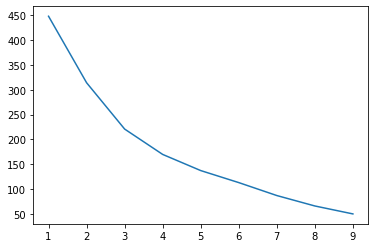

In [139]:
losses = []
X = [1,2,3,4,5,6,7,8,9]
for i in range(1,10) :
    kmeans = KMeans(n_clusters=i).fit(full_data)
    kmeans_loss = kmeans.inertia_
    losses.append(kmeans_loss)
plt.plot(X,losses)
plt.show

In [140]:
kmeans = KMeans(n_clusters=5).fit(full_data)
kmeans_labels = kmeans.labels_
print(kmeans_labels)

[4 2 2 0 0 2 1 2 2 2 0 1 2 2 3 2]


In [141]:
tot_df.insert(1,'cluster',kmeans_labels)
tot_df

,state,cluster,0,1,2,3,4,5,6,7,...,18,19,20,21,22,23,24,25,26,27
0,Andhra_Pradesh,4,-0.001229,1.134480,1.330479,301.868713,1.581279,0.001978,0.248027,3.255033e-08,...,0.076613,4.802656e-06,0.008340,1.663523e-14,7.455691e-11,7.417347e-15,3.835763,0.000130,4.024449e-12,1.673604e-06
1,Bihar,2,-0.001656,1.031843,1.498345,299.748993,1.482268,0.003560,0.249124,3.501319e-07,...,0.001287,2.403487e-07,0.000090,6.598254e-15,3.412872e-11,1.828802e-13,15.829796,0.000180,4.134414e-11,1.295352e-06
2,Chhattisgarh,2,-0.001527,2.061678,2.172492,299.499023,1.537672,0.003853,0.248395,2.900420e-07,...,0.002349,4.174124e-07,0.000207,3.226073e-15,1.064060e-10,2.638507e-11,11.519966,0.000403,6.601789e-11,2.042819e-06
3,Gujarat,0,-0.000732,1.268641,1.283179,302.195496,1.588620,0.001620,0.181327,5.716803e-07,...,0.001175,3.089622e-07,0.000198,1.583360e-14,4.293404e-11,2.244909e-11,5.337778,0.000231,4.204027e-11,3.810828e-06
4,Haryana,0,-0.000934,0.029176,1.110758,300.030548,1.510832,0.001516,0.160569,7.001354e-07,...,0.001007,1.496486e-07,0.000252,2.322358e-14,3.552053e-16,2.476417e-08,39.287380,0.000144,4.850544e-12,3.457962e-06
5,Jharkhand,2,-0.001622,2.010484,2.157724,298.446472,1.518544,0.003355,0.249539,2.546512e-07,...,0.001749,3.273889e-07,0.000200,4.593867e-15,1.249273e-10,3.443459e-11,16.171352,0.000194,5.400337e-11,2.275353e-06
6,Karnataka,1,-0.001248,1.848178,1.625406,299.870880,1.596949,0.003452,0.294988,5.351092e-07,...,0.001195,2.397951e-07,0.000116,2.944583e-15,5.810196e-10,6.132322e-12,2.597852,0.000297,7.546802e-11,5.459564e-07
7,Madhya,2,-0.001355,1.823066,1.845102,300.041931,1.574159,0.002811,0.277803,4.515821e-07,...,0.001556,2.087701e-07,0.000099,7.112851e-15,9.322553e-12,1.293026e-09,12.727736,0.000368,4.672556e-11,1.696104e-06
8,Maharashtra,2,-0.001182,1.587249,1.741596,301.106171,1.628126,0.002679,0.272612,5.863158e-07,...,0.001254,1.903771e-07,0.000124,3.963964e-15,2.927013e-12,1.147073e-10,6.896009,0.000314,3.991448e-11,2.094052e-06
9,Odisha,2,-0.001669,2.157579,2.342014,300.082550,1.521580,0.003939,0.256250,2.617964e-07,...,0.002371,4.717953e-07,0.000249,3.660353e-15,5.645641e-11,6.130546e-14,9.167884,0.000233,8.287674e-11,2.184356e-06


In [142]:
#plot_data=tot_df.drop(columns = ['evabs', 'lai_hv', 'lai_lv', 'stl1', 'ssr', 'tp', 'swvl1'])
plot_data=tot_df.copy()
plot_data['state'] = plot_data['state'].replace(to_replace='Andhra_Pradesh', value='Andhra Pradesh')
plot_data['state'] = plot_data['state'].replace(to_replace='Madhya', value='Madhya Pradesh')
plot_data['state'] = plot_data['state'].replace(to_replace='Tamil_Nadu', value='Tamil Nadu')
plot_data['state'] = plot_data['state'].replace(to_replace='Uttar_Pradesh', value='Uttar Pradesh')
plot_data['state'] = plot_data['state'].replace(to_replace='West_Bengal', value='West Bengal')
plot_data

,state,cluster,0,1,2,3,4,5,6,7,...,18,19,20,21,22,23,24,25,26,27
0,Andhra Pradesh,4,-0.001229,1.134480,1.330479,301.868713,1.581279,0.001978,0.248027,3.255033e-08,...,0.076613,4.802656e-06,0.008340,1.663523e-14,7.455691e-11,7.417347e-15,3.835763,0.000130,4.024449e-12,1.673604e-06
1,Bihar,2,-0.001656,1.031843,1.498345,299.748993,1.482268,0.003560,0.249124,3.501319e-07,...,0.001287,2.403487e-07,0.000090,6.598254e-15,3.412872e-11,1.828802e-13,15.829796,0.000180,4.134414e-11,1.295352e-06
2,Chhattisgarh,2,-0.001527,2.061678,2.172492,299.499023,1.537672,0.003853,0.248395,2.900420e-07,...,0.002349,4.174124e-07,0.000207,3.226073e-15,1.064060e-10,2.638507e-11,11.519966,0.000403,6.601789e-11,2.042819e-06
3,Gujarat,0,-0.000732,1.268641,1.283179,302.195496,1.588620,0.001620,0.181327,5.716803e-07,...,0.001175,3.089622e-07,0.000198,1.583360e-14,4.293404e-11,2.244909e-11,5.337778,0.000231,4.204027e-11,3.810828e-06
4,Haryana,0,-0.000934,0.029176,1.110758,300.030548,1.510832,0.001516,0.160569,7.001354e-07,...,0.001007,1.496486e-07,0.000252,2.322358e-14,3.552053e-16,2.476417e-08,39.287380,0.000144,4.850544e-12,3.457962e-06
5,Jharkhand,2,-0.001622,2.010484,2.157724,298.446472,1.518544,0.003355,0.249539,2.546512e-07,...,0.001749,3.273889e-07,0.000200,4.593867e-15,1.249273e-10,3.443459e-11,16.171352,0.000194,5.400337e-11,2.275353e-06
6,Karnataka,1,-0.001248,1.848178,1.625406,299.870880,1.596949,0.003452,0.294988,5.351092e-07,...,0.001195,2.397951e-07,0.000116,2.944583e-15,5.810196e-10,6.132322e-12,2.597852,0.000297,7.546802e-11,5.459564e-07
7,Madhya Pradesh,2,-0.001355,1.823066,1.845102,300.041931,1.574159,0.002811,0.277803,4.515821e-07,...,0.001556,2.087701e-07,0.000099,7.112851e-15,9.322553e-12,1.293026e-09,12.727736,0.000368,4.672556e-11,1.696104e-06
8,Maharashtra,2,-0.001182,1.587249,1.741596,301.106171,1.628126,0.002679,0.272612,5.863158e-07,...,0.001254,1.903771e-07,0.000124,3.963964e-15,2.927013e-12,1.147073e-10,6.896009,0.000314,3.991448e-11,2.094052e-06
9,Odisha,2,-0.001669,2.157579,2.342014,300.082550,1.521580,0.003939,0.256250,2.617964e-07,...,0.002371,4.717953e-07,0.000249,3.660353e-15,5.645641e-11,6.130546e-14,9.167884,0.000233,8.287674e-11,2.184356e-06


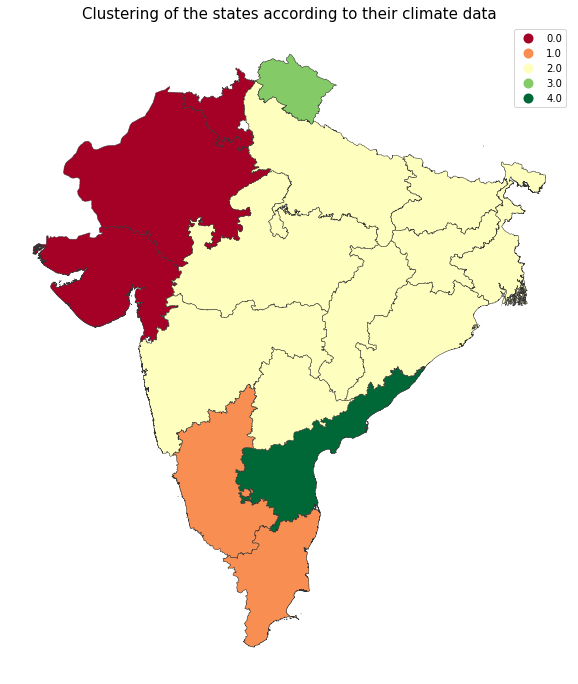

In [143]:
map_path = '../../maps/gadm36_IND_shp/gadm36_IND_1.shp'
map_gdf = gpd.read_file(map_path)
merged = map_gdf.set_index('NAME_1').join(plot_data.set_index('state'))

fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Clustering of the states according to their climate data',
            fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='cluster', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2', categorical=True, legend=True)

## Clustering according to the seasons

We split the dataset in two according to the season of the measures.

In [235]:
ds_Andhra_Pradesh = xr.open_dataset('../../Data/ClimateData/Andhra_Pradesh.nc')
df_Andhra_Pradesh = ds_Andhra_Pradesh.to_dataframe()
df_Andhra_Pradesh.reset_index(inplace=True)
df_Andhra_Pradesh = df_Andhra_Pradesh.drop(columns = ['longitude', 'latitude'])

time_arr = df_Andhra_Pradesh['time'].to_numpy()
#time_arr
months = time_arr.astype('datetime64[M]').astype(int) % 12 + 1
#months
months_df = pd.DataFrame(months, columns=['month']) 

kharif_months = [6,7,8,9,10]
rabi_months = [1,2,3,4,5,11,12]
df_Andhra_Pradesh['month'] = months_df['month']
df_AP_rabi = df_Andhra_Pradesh[df_Andhra_Pradesh['month'].isin(rabi_months)]
df_AP_kharif = df_Andhra_Pradesh[df_Andhra_Pradesh['month'].isin(kharif_months)]
df_AP_rabi = df_AP_rabi.drop(columns = ['month'])
df_AP_kharif = df_AP_kharif.drop(columns = ['month'])

df_AP_rabi['time'] = df_AP_rabi['time'].astype('datetime64')
df_AP_rabi['ssr'] = df_AP_rabi['ssr']*1e-7
#print(df_AP_rabi)

mean_years_AP_rabi = df_AP_rabi.groupby(df_AP_rabi.time.dt.to_period("Y")).mean()
var_years_AP_rabi = df_AP_rabi.groupby(df_AP_rabi.time.dt.to_period("Y")).var()
#print(mean_years_AP_rabi)

mean_mean_arr_rabi = mean_years_AP_rabi.mean().to_numpy().reshape(1,7)
mean_var_arr_rabi = mean_years_AP_rabi.var().to_numpy().reshape(1,7)
var_mean_arr_rabi = var_years_AP_rabi.mean().to_numpy().reshape(1,7)
var_var_arr_rabi = var_years_AP_rabi.var().to_numpy().reshape(1,7)

df_AP_kharif['time'] = df_AP_kharif['time'].astype('datetime64')
df_AP_kharif['ssr'] = df_AP_kharif['ssr']*1e-7
#print(df_AP_kharif)

mean_years_AP_kharif = df_AP_kharif.groupby(df_AP_kharif.time.dt.to_period("Y")).mean()
var_years_AP_kharif = df_AP_kharif.groupby(df_AP_kharif.time.dt.to_period("Y")).var()
#print(mean_years_AP_kharif)

mean_mean_arr_kharif = mean_years_AP_kharif.mean().to_numpy().reshape(1,7)
mean_var_arr_kharif = mean_years_AP_kharif.var().to_numpy().reshape(1,7)
var_mean_arr_kharif = var_years_AP_kharif.mean().to_numpy().reshape(1,7)
var_var_arr_kharif = var_years_AP_kharif.var().to_numpy().reshape(1,7)


#mean_rabi_arr = df_AP_rabi.mean().to_numpy().reshape(1,7)
#mean_kharif_arr = df_AP_kharif.mean().to_numpy().reshape(1,7)
#var_rabi_arr = df_AP_rabi.var().to_numpy().reshape(1,7)
#var_kharif_arr = df_AP_kharif.var().to_numpy().reshape(1,7)
#print(mean_rabi_arr)
#print(mean_kharif_arr)

states_names = ['Andhra_Pradesh', 'Bihar', 'Chhattisgarh', 'Gujarat', 'Haryana', 'Jharkhand', 'Karnataka', 'Madhya', 'Maharashtra', 'Odisha', 'Rajasthan', 'Tamil_Nadu', 'Telangana','Uttar_Pradesh', 'Uttarakhand', 'West_Bengal']

for state in states_names :
    if state != 'Andhra_Pradesh' :
        ds_state = xr.open_dataset(f'../../Data/ClimateData/{state}.nc')
        df_state = ds_state.to_dataframe()
        df_state.reset_index(inplace=True)
        df_state = df_state.drop(columns = ['longitude', 'latitude'])

        time_arr = df_state['time'].to_numpy()
        months = time_arr.astype('datetime64[M]').astype(int) % 12 + 1
        months_df = pd.DataFrame(months, columns=['month']) 

        df_state['month'] = months_df['month']
        df_state_rabi = df_state[df_state['month'].isin(rabi_months)]
        df_state_kharif = df_state[df_state['month'].isin(kharif_months)]
        df_state_rabi = df_state_rabi.drop(columns = ['month'])
        df_state_kharif = df_state_kharif.drop(columns = ['month'])

        df_state_rabi['time'] = df_state_rabi['time'].astype('datetime64')
        df_state_rabi['ssr'] = df_state_rabi['ssr']*1e-7

        mean_years_state_rabi = df_state_rabi.groupby(df_state.time.dt.to_period("Y")).mean()
        var_years_state_rabi = df_state_rabi.groupby(df_state.time.dt.to_period("Y")).var()

        mean_mean_arr_rabi = np.concatenate((mean_mean_arr_rabi, mean_years_state_rabi.mean().to_numpy().reshape(1,7)), axis=0)
        mean_var_arr_rabi = np.concatenate((mean_var_arr_rabi, var_years_state_rabi.mean().to_numpy().reshape(1,7)), axis=0)
        var_mean_arr_rabi = np.concatenate((var_mean_arr_rabi, mean_years_state_rabi.var().to_numpy().reshape(1,7)), axis=0)
        var_var_arr_rabi = np.concatenate((var_var_arr_rabi, var_years_state_rabi.var().to_numpy().reshape(1,7)), axis=0)

        df_state_kharif['time'] = df_state_kharif['time'].astype('datetime64')
        df_state_kharif['ssr'] = df_state_kharif['ssr']*1e-7

        mean_years_state_kharif = df_state_kharif.groupby(df_state.time.dt.to_period("Y")).mean()
        var_years_state_kharif = df_state_kharif.groupby(df_state.time.dt.to_period("Y")).var()

        mean_mean_arr_kharif = np.concatenate((mean_mean_arr_kharif, mean_years_state_kharif.mean().to_numpy().reshape(1,7)), axis=0)
        mean_var_arr_kharif = np.concatenate((mean_var_arr_kharif, var_years_state_kharif.mean().to_numpy().reshape(1,7)), axis=0)
        var_mean_arr_kharif = np.concatenate((var_mean_arr_kharif, mean_years_state_kharif.var().to_numpy().reshape(1,7)), axis=0)
        var_var_arr_kharif = np.concatenate((var_var_arr_kharif, var_years_state_kharif.var().to_numpy().reshape(1,7)), axis=0)

        #mean_rabi_arr = np.concatenate((mean_rabi_arr,df_state_rabi.mean().to_numpy().reshape(1,7)), axis=0)
        #mean_kharif_arr = np.concatenate((mean_kharif_arr,df_state_kharif.mean().to_numpy().reshape(1,7)), axis=0)
        #var_rabi_arr = np.concatenate((var_rabi_arr,df_state_rabi.var().to_numpy().reshape(1,7)), axis=0)
        #var_kharif_arr = np.concatenate((var_kharif_arr,df_state_kharif.var().to_numpy().reshape(1,7)), axis=0)

#tot_rabi_arr = np.concatenate((mean_rabi_arr, var_rabi_arr), axis=1)
tot_rabi_arr = np.concatenate((mean_mean_arr_rabi, mean_var_arr_rabi, var_mean_arr_rabi, var_var_arr_rabi), axis=1)
#tot_kharif_arr = np.concatenate((mean_kharif_arr, var_rabi_arr), axis=1)
tot_kharif_arr = np.concatenate((mean_mean_arr_kharif, mean_var_arr_kharif, var_mean_arr_kharif, var_var_arr_kharif), axis=1)

tot_rabi_df = pd.DataFrame(tot_rabi_arr)
tot_kharif_df = pd.DataFrame(tot_kharif_arr)

tot_rabi_df.insert(0,'state',states_names)
tot_kharif_df.insert(0,'state',states_names)

#print(mean_rabi_df)
#print(mean_kharif_df)

### Rabi clustering

/Users/adrien/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/adrien/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/Users/adrien/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: overflow encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/adrien/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: overflow encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/adrien/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: overflow encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/adrien/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: R

<function matplotlib.pyplot.show(*args, **kw)>

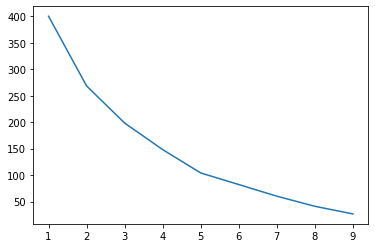

In [236]:
full_data=tot_rabi_df.drop(columns = ['state'])

for c in full_data.columns:
    pt = PowerTransformer()
    full_data.loc[:, c] = pt.fit_transform(np.array(full_data[c]).reshape(-1, 1))

losses = []
X = [1,2,3,4,5,6,7,8,9]
for i in range(1,10) :
    kmeans = KMeans(n_clusters=i).fit(full_data)
    kmeans_loss = kmeans.inertia_
    losses.append(kmeans_loss)
plt.plot(X,losses)
plt.show

In [237]:
kmeans = KMeans(n_init=100, n_clusters=5).fit(full_data)
kmeans_labels = kmeans.labels_
tot_rabi_df.insert(1,'cluster',kmeans_labels)
#plot_data=tot_rabi_df.drop(columns = ['evabs', 'lai_hv', 'lai_lv', 'stl1', 'ssr', 'tp', 'swvl1'])
plot_data = tot_rabi_df.copy()
plot_data['state'] = plot_data['state'].replace(to_replace='Andhra_Pradesh', value='Andhra Pradesh')
plot_data['state'] = plot_data['state'].replace(to_replace='Madhya', value='Madhya Pradesh')
plot_data['state'] = plot_data['state'].replace(to_replace='Tamil_Nadu', value='Tamil Nadu')
plot_data['state'] = plot_data['state'].replace(to_replace='Uttar_Pradesh', value='Uttar Pradesh')
plot_data['state'] = plot_data['state'].replace(to_replace='West_Bengal', value='West Bengal')
plot_data

,state,cluster,0,1,2,3,4,5,6,7,...,18,19,20,21,22,23,24,25,26,27
0,Andhra Pradesh,2,-0.000969,1.126076,1.280406,302.019318,1.702742,0.000922,0.209493,3.631465e-08,...,0.078782,2.444021e-06,0.006186,1.155537e-14,2.234796e-10,2.187973e-11,9.087453,0.000493,5.006164e-12,2.026675e-06
1,Bihar,3,-0.001341,1.019985,1.412071,298.004486,1.583694,0.000727,0.174618,1.566319e-07,...,0.001118,4.488753e-08,0.000115,1.890276e-15,1.039395e-10,5.621270e-10,32.532452,0.000301,1.743664e-12,3.476640e-07
2,Chhattisgarh,1,-0.001370,1.975344,2.116143,299.199890,1.719178,0.000603,0.172067,1.574350e-07,...,0.001475,1.044071e-07,0.000336,1.597155e-15,2.066504e-11,1.583139e-10,26.393560,0.000308,3.291994e-12,1.511995e-06
3,Gujarat,3,-0.000458,1.251782,1.244876,301.218323,1.713802,0.000107,0.135169,1.819174e-07,...,0.000413,2.069506e-08,0.000039,5.190881e-15,1.353672e-10,1.328454e-10,9.027532,0.000117,2.611824e-13,2.833344e-07
4,Haryana,3,-0.000549,0.029174,1.108117,296.568909,1.499547,0.000543,0.131287,2.011956e-07,...,0.000777,6.860215e-08,0.000184,1.687825e-14,0.000000e+00,7.334385e-08,61.846268,0.000202,1.850500e-13,9.246002e-07
5,Jharkhand,1,-0.001440,1.948969,2.059540,297.133514,1.662085,0.000667,0.175545,1.316624e-07,...,0.001291,5.482749e-08,0.000308,2.069067e-15,1.746729e-10,6.453335e-12,29.422857,0.000299,1.421627e-13,8.876852e-07
6,Karnataka,0,-0.001157,1.911463,1.610046,300.929504,1.795637,0.000894,0.231262,5.027170e-07,...,0.001215,7.827249e-08,0.000124,4.665332e-15,1.591659e-09,1.667678e-11,5.169321,0.000290,3.542851e-12,1.072531e-06
7,Madhya Pradesh,1,-0.001033,1.776540,1.768037,299.130371,1.722924,0.000321,0.218977,1.370127e-07,...,0.001062,3.804319e-08,0.000160,2.116174e-15,5.504591e-14,1.790429e-09,19.715282,0.000355,9.476958e-14,8.327345e-07
8,Maharashtra,1,-0.000889,1.545046,1.673636,301.748077,1.812972,0.000344,0.205041,2.750361e-07,...,0.000916,3.568005e-08,0.000113,8.061301e-15,1.801260e-11,1.872703e-10,14.708754,0.000383,3.395558e-13,8.234525e-07
9,Odisha,1,-0.001545,2.088576,2.267157,299.573395,1.685854,0.000800,0.180444,1.794189e-07,...,0.001642,1.737727e-07,0.000418,1.794385e-15,2.171154e-11,2.196152e-11,21.163250,0.000248,1.975544e-12,1.696620e-06


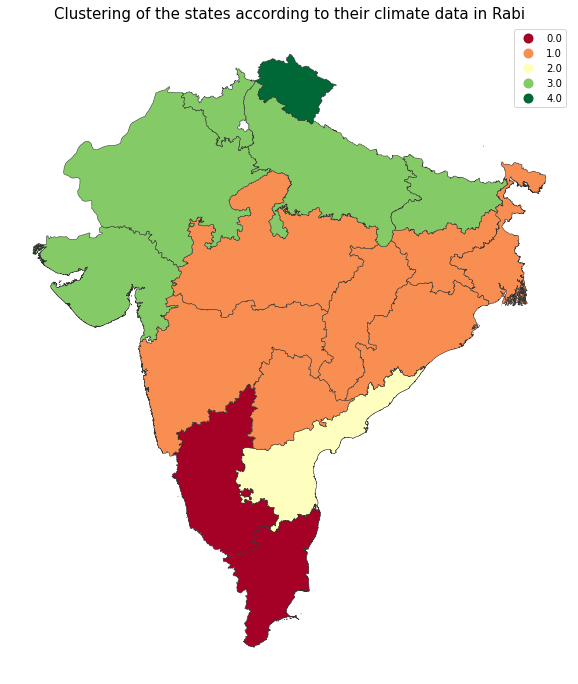

In [238]:
map_path = '../../maps/gadm36_IND_shp/gadm36_IND_1.shp'
map_gdf = gpd.read_file(map_path)
merged = map_gdf.set_index('NAME_1').join(plot_data.set_index('state'))

fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Clustering of the states according to their climate data in Rabi',
            fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='cluster', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2', categorical=True, legend=True)

In [239]:
plot_data = plot_data.drop(columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27])
plot_data

,state,cluster
0,Andhra Pradesh,2
1,Bihar,3
2,Chhattisgarh,1
3,Gujarat,3
4,Haryana,3
5,Jharkhand,1
6,Karnataka,0
7,Madhya Pradesh,1
8,Maharashtra,1
9,Odisha,1


In [240]:
plot_data.to_csv('../../Outputs/Predictions/climate_clusters_rabi.csv')

### Kharif clustering

/Users/adrien/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/adrien/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: overflow encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/adrien/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/Users/adrien/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/adrien/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/adrien/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_dat

<function matplotlib.pyplot.show(*args, **kw)>

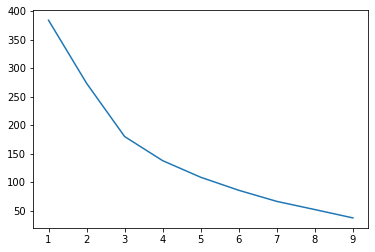

In [227]:
full_data=tot_kharif_df.drop(columns = ['state'])

for c in full_data.columns:
    pt = PowerTransformer()
    full_data.loc[:, c] = pt.fit_transform(np.array(full_data[c]).reshape(-1, 1))

losses = []
X = [1,2,3,4,5,6,7,8,9]
for i in range(1,10) :
    kmeans = KMeans(n_clusters=i).fit(full_data)
    kmeans_loss = kmeans.inertia_
    losses.append(kmeans_loss)
plt.plot(X,losses)
plt.show

In [228]:
kmeans = KMeans(n_init=100, n_clusters=5).fit(full_data)
kmeans_labels = kmeans.labels_
tot_kharif_df.insert(1,'cluster',kmeans_labels)
#plot_data=tot_kharif_df.drop(columns = ['evabs', 'lai_hv', 'lai_lv', 'stl1', 'ssr', 'tp', 'swvl1'])
plot_data=tot_kharif_df.copy()
plot_data['state'] = plot_data['state'].replace(to_replace='Andhra_Pradesh', value='Andhra Pradesh')
plot_data['state'] = plot_data['state'].replace(to_replace='Madhya', value='Madhya Pradesh')
plot_data['state'] = plot_data['state'].replace(to_replace='Tamil_Nadu', value='Tamil Nadu')
plot_data['state'] = plot_data['state'].replace(to_replace='Uttar_Pradesh', value='Uttar Pradesh')
plot_data['state'] = plot_data['state'].replace(to_replace='West_Bengal', value='West Bengal')
plot_data

,state,cluster,0,1,2,3,4,5,6,7,...,18,19,20,21,22,23,24,25,26,27
0,Andhra Pradesh,2,-0.001593,1.146244,1.400581,301.657806,1.411231,0.003457,0.301975,7.317406e-08,...,0.020724,3.841602e-06,0.005874,1.136262e-14,1.309429e-13,0.000000e+00,1.840560,0.000073,6.816955e-12,0.000001
1,Bihar,0,-0.002098,1.048445,1.619125,302.191376,1.340272,0.007527,0.353433,2.609366e-07,...,0.003737,1.253542e-06,0.000239,1.156443e-14,1.309429e-13,2.045982e-15,5.431562,0.000202,6.667399e-11,0.000002
2,Chhattisgarh,3,-0.001746,2.182543,2.251383,299.917877,1.283562,0.008403,0.355253,3.670562e-07,...,0.008127,2.072002e-06,0.000324,1.108830e-14,8.183930e-15,5.819684e-14,7.152843,0.000417,7.920630e-11,0.000002
3,Gujarat,1,-0.001115,1.292241,1.336803,303.563446,1.413364,0.003738,0.245948,8.501590e-07,...,0.005777,1.788182e-06,0.001037,3.101093e-14,0.000000e+00,1.454921e-14,2.170753,0.000338,1.084719e-10,0.000003
4,Haryana,1,-0.001474,0.029178,1.114457,304.876740,1.526631,0.002877,0.201564,8.505414e-07,...,0.004612,8.065919e-07,0.001021,3.502985e-14,1.150865e-15,2.045982e-15,16.958984,0.000275,1.009869e-11,0.000005
5,Jharkhand,3,-0.001878,2.096604,2.295182,300.284607,1.317587,0.007117,0.353130,2.852364e-07,...,0.006059,1.712170e-06,0.000409,8.841262e-15,0.000000e+00,2.045982e-15,7.510013,0.000243,9.983821e-11,0.000003
6,Karnataka,0,-0.001376,1.759576,1.646911,298.388794,1.318786,0.007034,0.384205,5.358127e-07,...,0.004059,1.206241e-06,0.000366,8.583861e-15,5.819684e-14,1.309429e-13,0.955809,0.000186,2.047451e-10,0.000003
7,Madhya Pradesh,3,-0.001806,1.888202,1.952993,301.318024,1.365887,0.006296,0.360160,5.243181e-07,...,0.007351,1.277827e-06,0.000465,1.346890e-14,5.819684e-14,0.000000e+00,12.093822,0.000596,1.032672e-10,0.000002
8,Maharashtra,0,-0.001592,1.646336,1.836741,300.207428,1.369341,0.005948,0.367213,7.162319e-07,...,0.005676,1.101087e-06,0.000562,8.067373e-15,9.093255e-14,3.637302e-15,4.541231,0.000192,8.976499e-11,0.000003
9,Odisha,3,-0.001843,2.254181,2.446815,300.795227,1.291596,0.008334,0.362379,2.954967e-07,...,0.006862,2.208199e-06,0.000320,1.182303e-14,0.000000e+00,9.093256e-16,4.885026,0.000298,1.299220e-10,0.000002


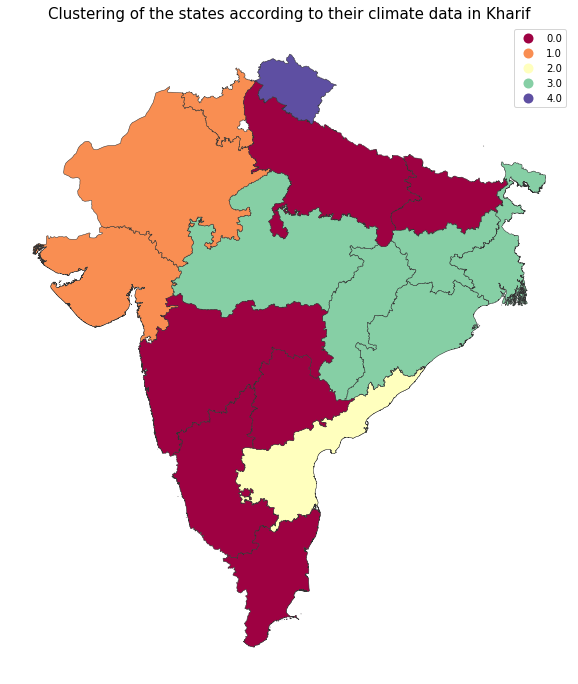

In [229]:
map_path = '../../maps/gadm36_IND_shp/gadm36_IND_1.shp'
map_gdf = gpd.read_file(map_path)
merged = map_gdf.set_index('NAME_1').join(plot_data.set_index('state'))

fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Clustering of the states according to their climate data in Kharif',
            fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='cluster', cmap='Spectral', linewidth=0.5, ax=ax, edgecolor='0.2', categorical=True, legend=True)

In [232]:
plot_data = plot_data.drop(columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27])
plot_data.to_csv('../../Outputs/Predictions/climate_clusters_kharif.csv')